## Read Data

In [1]:
import pandas as pd

In [2]:
path=r'C:\Users\satis\Downloads\heart.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Finding missing values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As you can see, we have no missing values in any columns. But, to remove missing values, you can run the below cell. We are not going to run the below cell.

In [6]:
# axis=0 to remove rows having null values and inplace=True to perform operation on the dataframe without creating new variable.
data.dropna(axis=0,inplace=True)

## Detecting Outliers

In [7]:
columns = data.columns.tolist()

In [8]:
data.boxplot(column=columns)

As we observe from above graph, columns like trestbps, chol have outliers. Next step is to remove them. We are not going to remove outliers from all the columns, we will only remove it from trestbps, chol.

## Remove Outliers

In [9]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [10]:
data = remove_outlier(data,'trestbps')
data = remove_outlier(data,'chol')

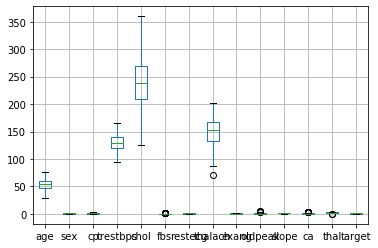

In [11]:
data.boxplot(column=columns)

As you can observe from the above graph, the data looks much cleaner. We can also apply the remove_outlier method to other columns but other columns do not have that many outliers and hence it would affect the downstream application significantly.

## Feature Engineering: Correlation Analysis

In [12]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.071181,-0.081388,0.263896,0.168762,0.105372,-0.099306,-0.420225,0.088255,0.207538,-0.155577,0.292572,0.049794,-0.232556
sex,-0.071181,1.000000,-0.105291,-0.006780,-0.119332,0.081043,-0.060141,-0.054896,0.195394,0.145174,-0.053084,0.157722,0.215226,-0.322153
cp,-0.081388,-0.105291,1.000000,0.063479,-0.087053,0.103931,0.075685,0.299527,-0.376807,-0.145022,0.125776,-0.160655,-0.204387,0.433499
trestbps,0.263896,-0.006780,0.063479,1.000000,0.077696,0.117879,-0.117055,-0.069873,-0.008282,0.147732,-0.054132,0.132656,-0.002175,-0.101026
chol,0.168762,-0.119332,-0.087053,0.077696,1.000000,0.021434,-0.110965,-0.025103,0.077189,-0.019801,0.051578,0.079115,0.063282,-0.100021
fbs,0.105372,0.081043,0.103931,0.117879,0.021434,1.000000,-0.080125,-0.013001,-0.006936,-0.018520,-0.057413,0.125129,-0.041913,-0.012757
restecg,-0.099306,-0.060141,0.075685,-0.117055,-0.110965,-0.080125,1.000000,0.065848,-0.096441,-0.037054,0.068426,-0.062074,0.017916,0.144498
thalach,-0.420225,-0.054896,0.299527,-0.069873,-0.025103,-0.013001,0.065848,1.000000,-0.378815,-0.343219,0.389107,-0.225590,-0.116727,0.437045
exang,0.088255,0.195394,-0.376807,-0.008282,0.077189,-0.006936,-0.096441,-0.378815,1.000000,0.287071,-0.246860,0.113024,0.229479,-0.423641
oldpeak,0.207538,0.145174,-0.145022,0.147732,-0.019801,-0.018520,-0.037054,-0.343219,0.287071,1.000000,-0.556066,0.214806,0.206082,-0.440552


Simplest way to identify correlation is to create correlation matrix. But matrix is difficult to interpret so we will use seaborn package to draw heatmaps. The relationship between columns is denoted by the shade of the color. There is a scale indicating how strong or weak the relationship is.

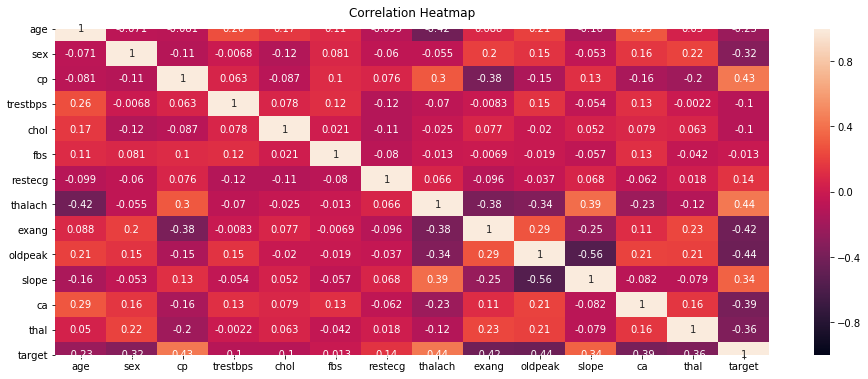

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As you can see from the above graph, we do not have any correlated columns. But incase you observe any correlations, drop those columns from the dataframe.

## EDA using pairplots

Simple pairplot using seaborn

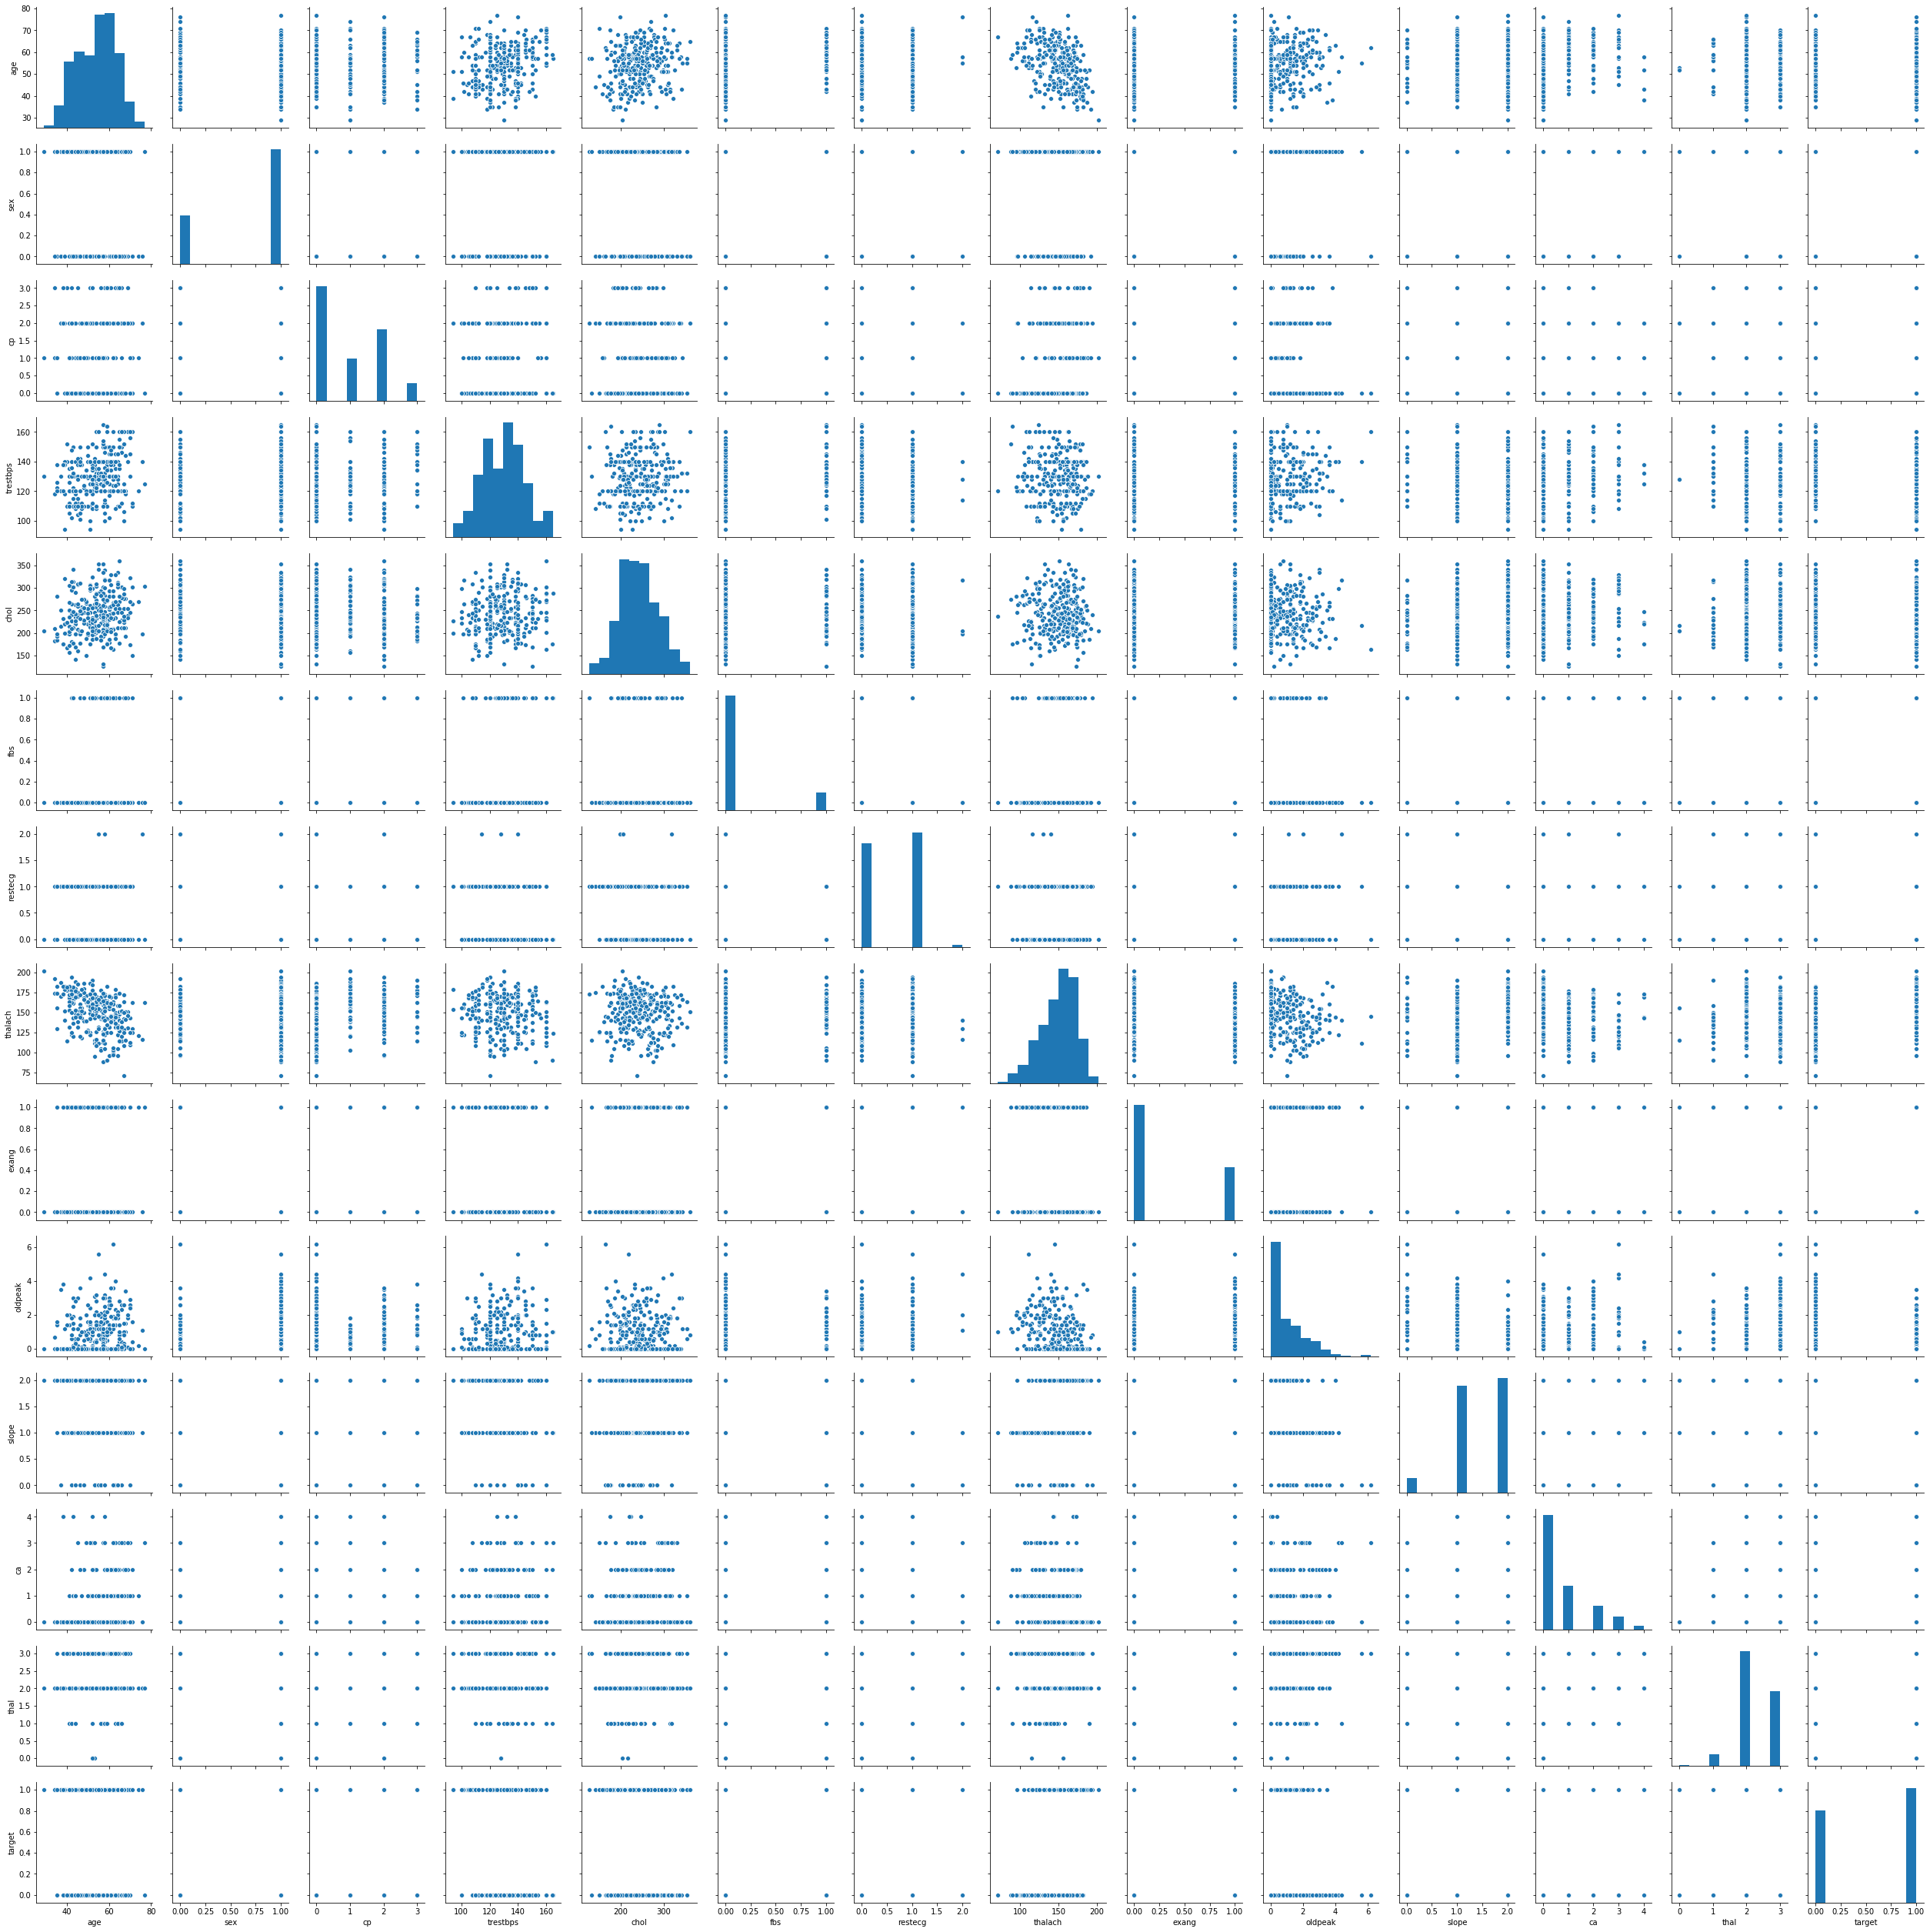

In [19]:
sns.pairplot(data)

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

From the above graphs, we can see that the data is somewhat skewed. Columns like oldpeak, thal etc either have skewed data or have discrete values.

While this plot alone can be useful in an analysis, we can find make it more valuable by coloring the figures based on a categorical variable such as continent. This is also extremely simple in seaborn! All we need to do is use the hue keyword in the sns.pairplot function call.

C:\Users\satis\Anaconda3\envs\py369\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\satis\Anaconda3\envs\py369\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


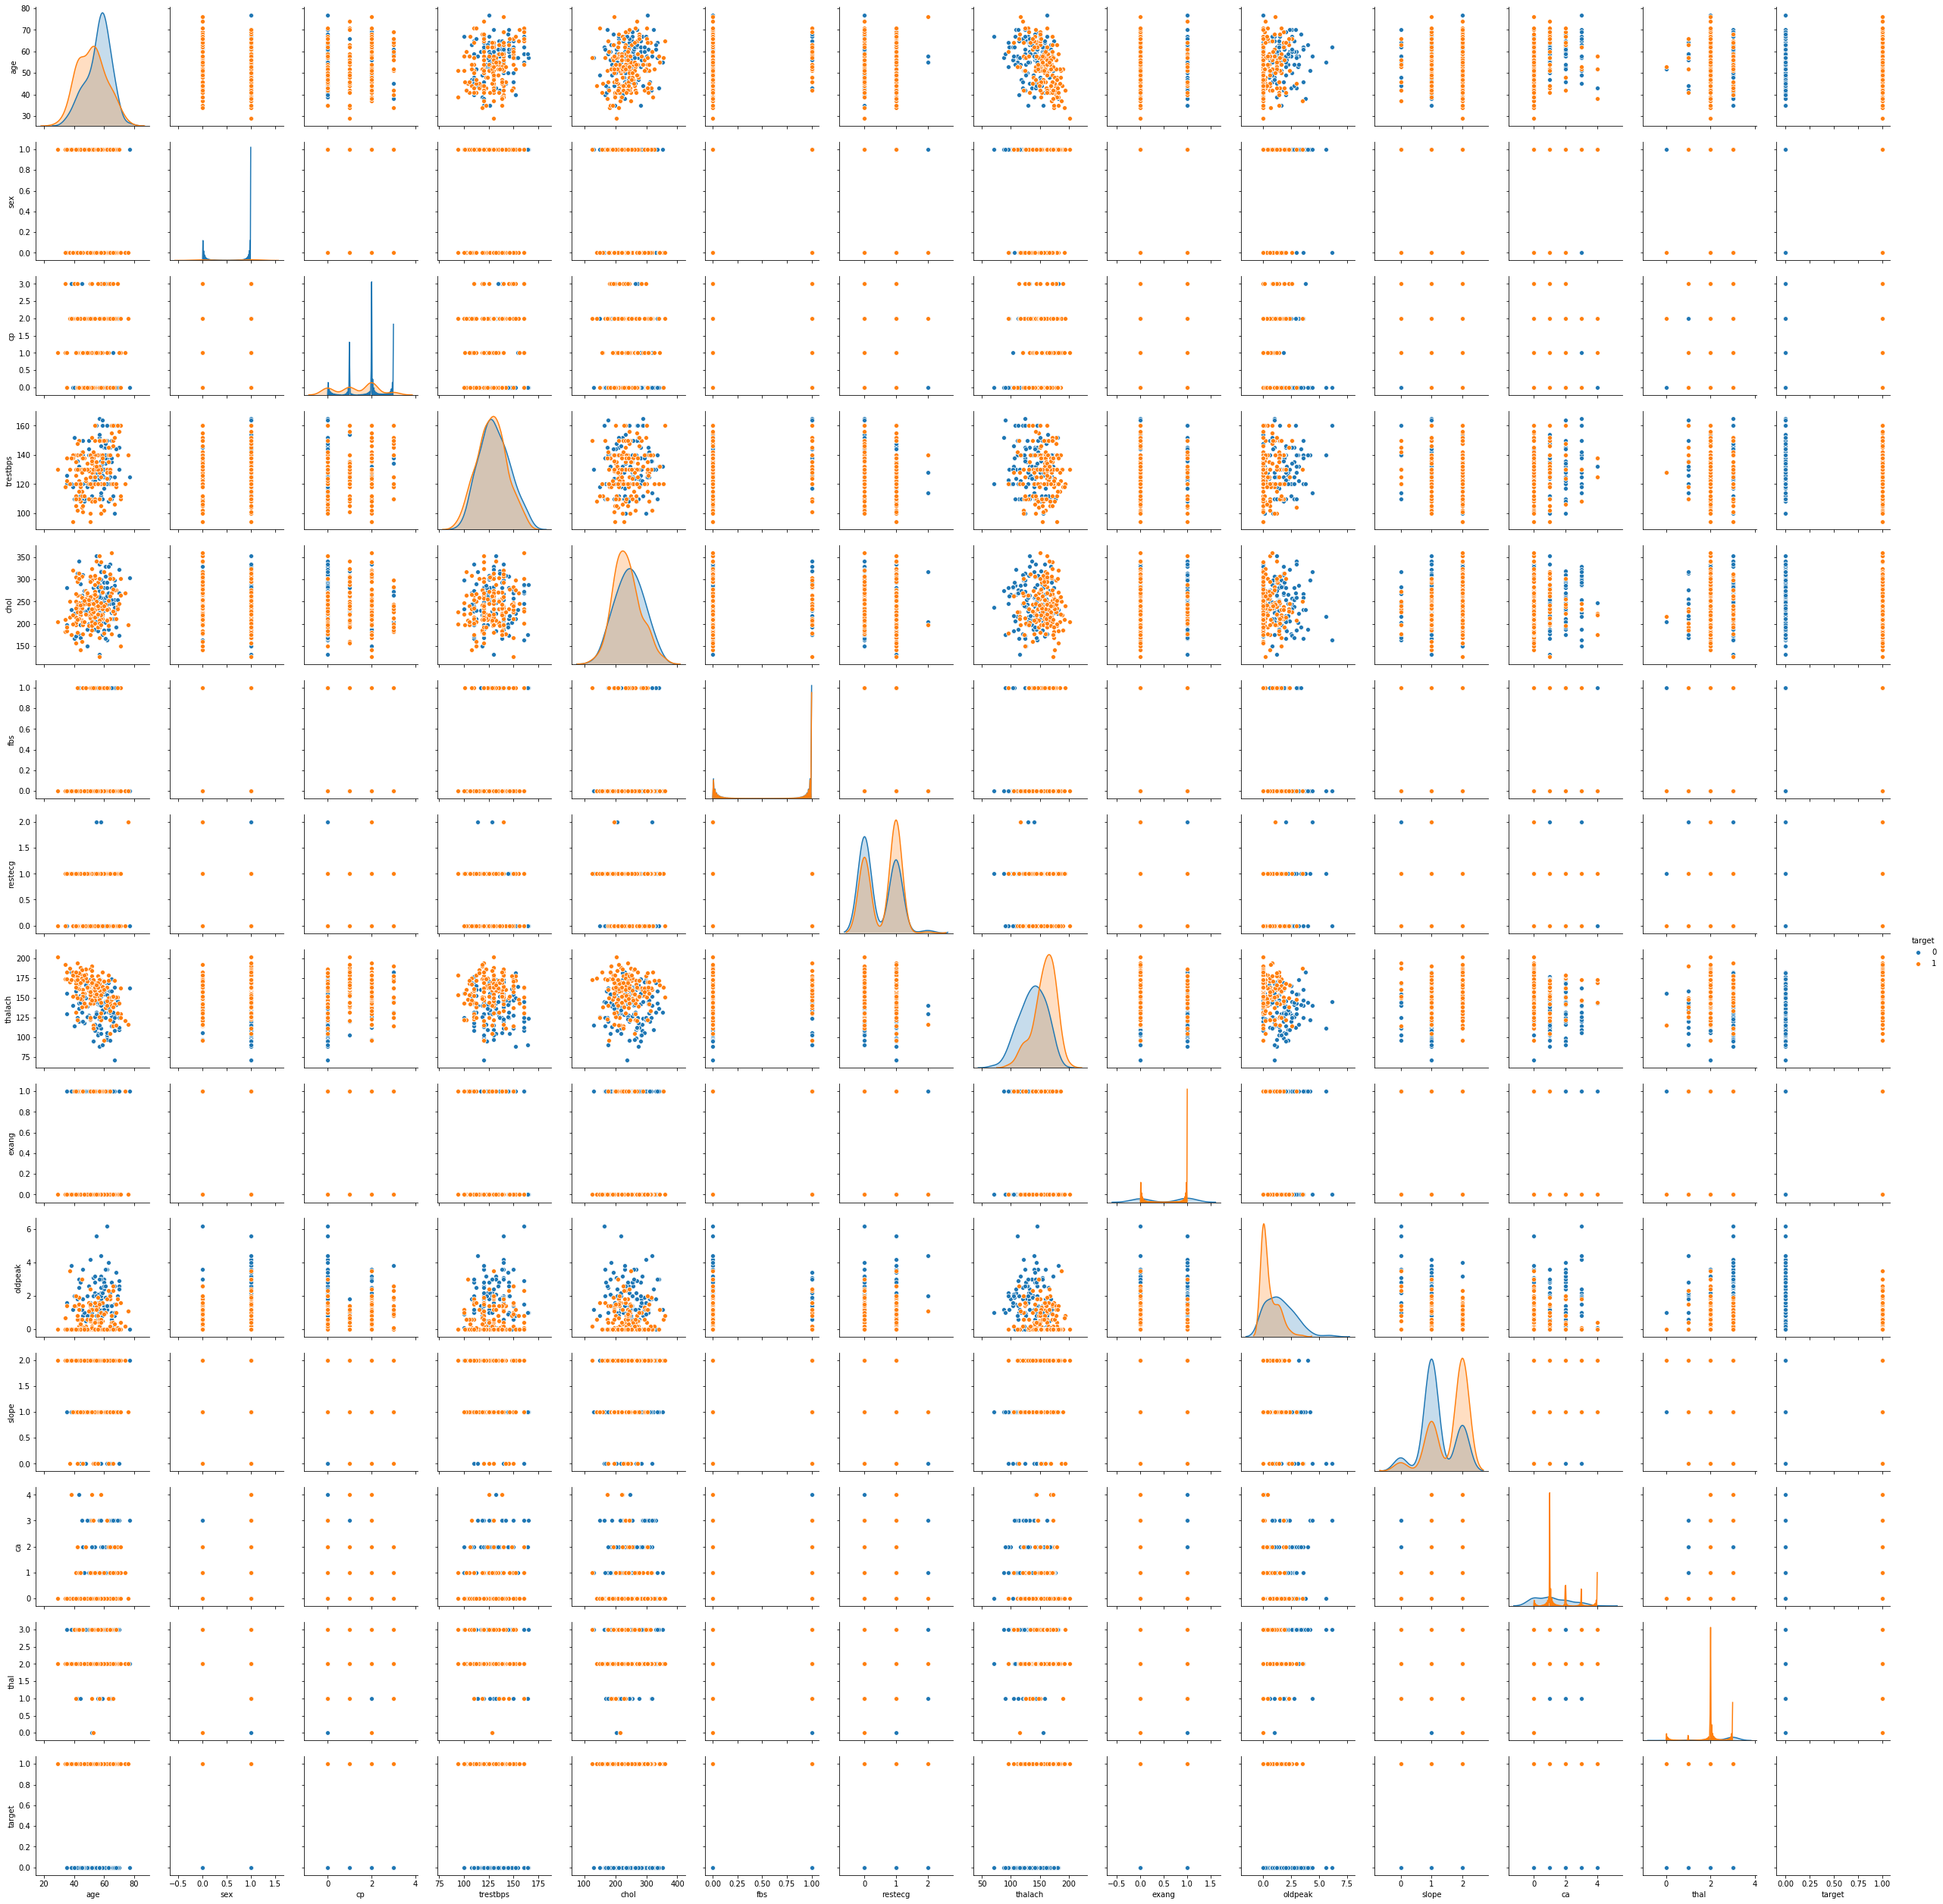

In [20]:
sns.pairplot(data, hue='target')